## Linear Regression

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [83]:
data = pd.read_csv("cost_revenue_dirty.csv")
data.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [84]:
data.shape

(5391, 6)

In [85]:
data = data[data["Worldwide Gross ($)"]!="$0"]
data = data[data["Domestic Gross ($)"]!="$0"]
data.shape

(4879, 6)

In [86]:
columns_numbers = ["Production Budget ($)", "Worldwide Gross ($)","Domestic Gross ($)"]
data = data[columns_numbers].replace({'\$': '', ',': ''}, regex=True) 
data = data[columns_numbers].astype(float)

In [87]:
data.head()

,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,110000.0,11000000.0,10000000.0
2,200000.0,8000000.0,8000000.0
3,100000.0,3000000.0,3000000.0
4,245000.0,22000000.0,11000000.0
5,3900000.0,9000000.0,9000000.0


In [88]:
data.describe()

,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
count,4.879000e+03,4.879000e+03,4.879000e+03
mean,3.355346e+07,9.788857e+07,4.556276e+07
std,4.154167e+07,1.746036e+08,6.797272e+07
min,1.100000e+03,4.010000e+02,3.880000e+02
25%,6.500000e+06,8.036698e+06,4.291514e+06
50%,2.000000e+07,3.455742e+07,2.180030e+07
75%,4.475000e+07,1.076746e+08,5.742777e+07
max,4.250000e+08,2.783919e+09,9.366622e+08


In [89]:
X = pd.DataFrame(data, columns=["Production Budget ($)"])
y = pd.DataFrame(data, columns=["Worldwide Gross ($)"])

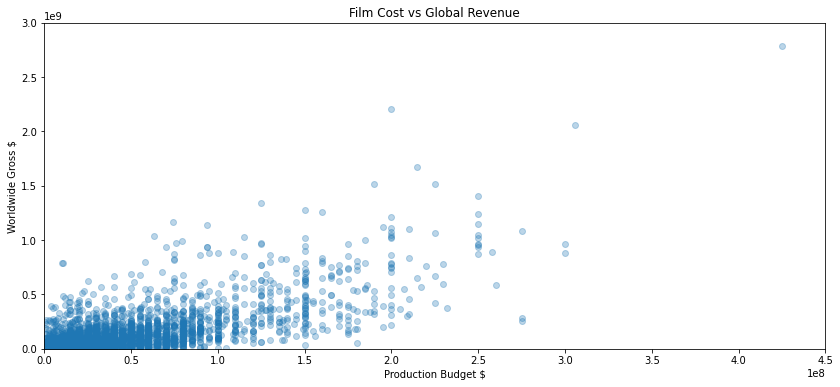

In [91]:
plt.figure(figsize=(14,6))
plt.scatter(X,y,alpha=0.3)
plt.title("Film Cost vs Global Revenue")
plt.xlabel("Production Budget $")
plt.ylabel("Worldwide Gross $")
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

In [92]:
regression = LinearRegression()
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Sloṕe Coefficient:

In [93]:
regression.coef_ # theta_i

array([[3.11158929]])

In [95]:
# Intercepyt
regression.intercept_

array([-6516010.52875766])

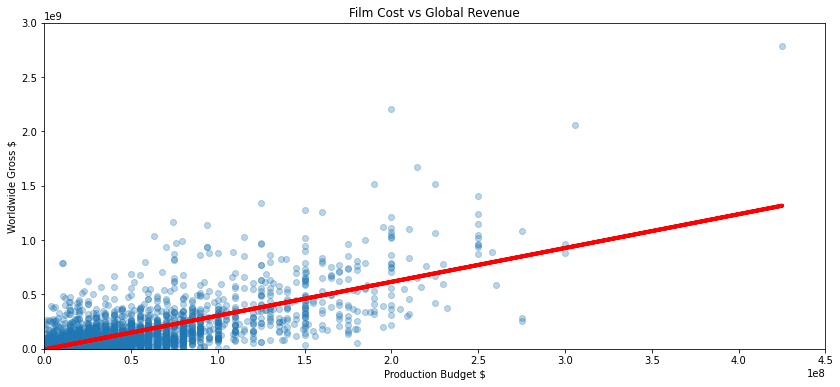

In [98]:
plt.figure(figsize=(14,6))
plt.scatter(X,y,alpha=0.3)
plt.plot(X, regression.predict(X), color="red", linewidth=4)
plt.title("Film Cost vs Global Revenue")
plt.xlabel("Production Budget $")
plt.ylabel("Worldwide Gross $")
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

In [99]:
regression.score(X,y)

0.5480572766399464